#BankLoan(Credit Risk Analysis)

In [4]:
#importing the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data Processing

In [5]:
#uploading dataset into colab note
from google.colab import files
data=files.upload()

Saving bankloan.csv to bankloan.csv


In [6]:
#creating a dataframe 
import io
df=pd.read_csv(io.BytesIO(data['bankloan.csv']))

In [7]:
#to viewing the first five rows of dataset
df.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [8]:
#to check there is any null values (or)any missing values are present
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

here we have a missing values in default column

In [9]:
#check the no.of rows and columns are 
df.shape

(850, 9)

In [10]:
#to check the datatype of the features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


#Univariate Analysis

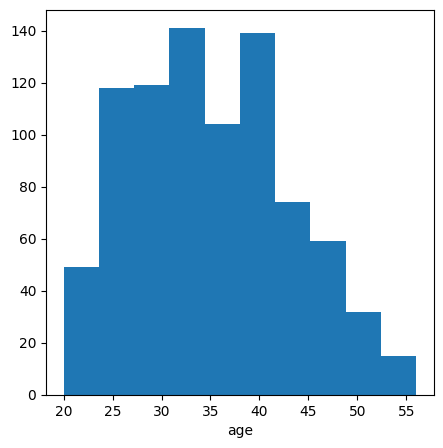

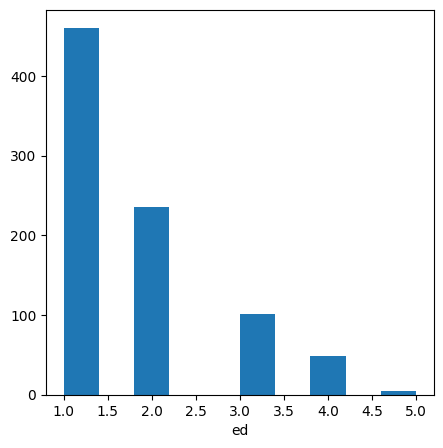

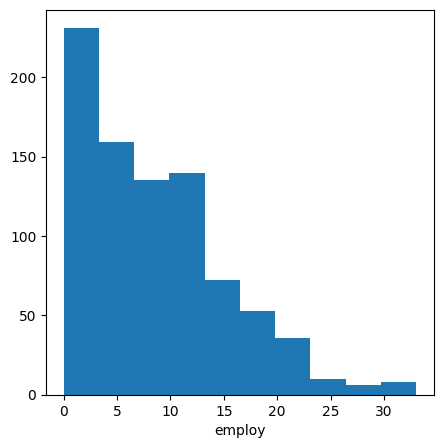

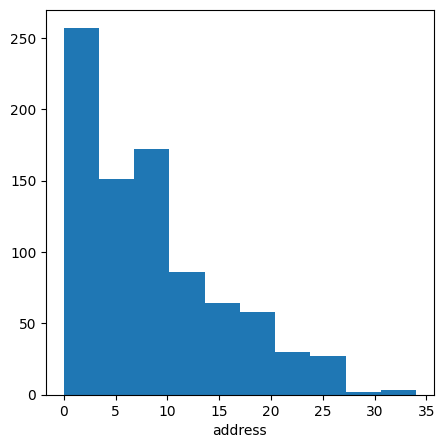

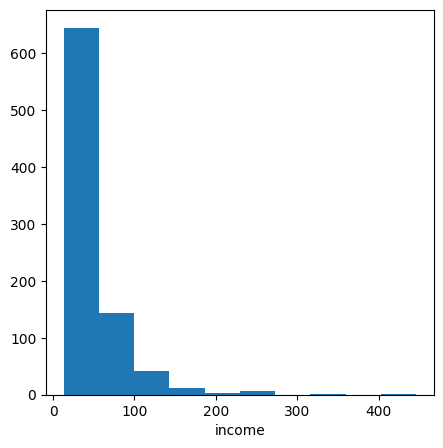

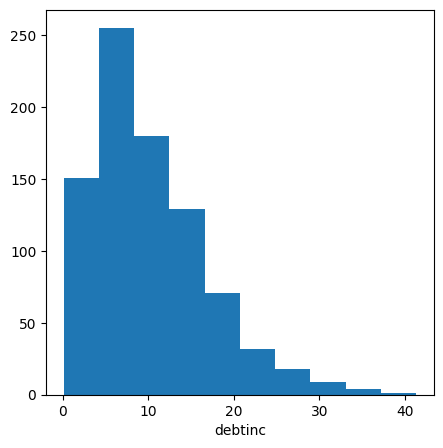

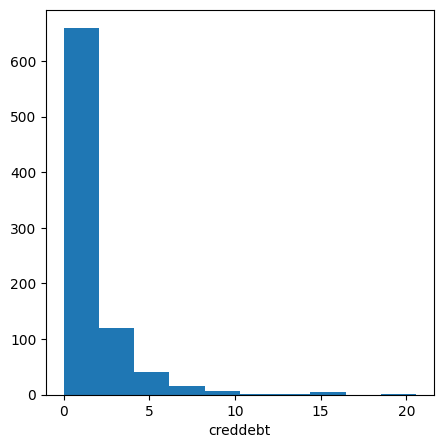

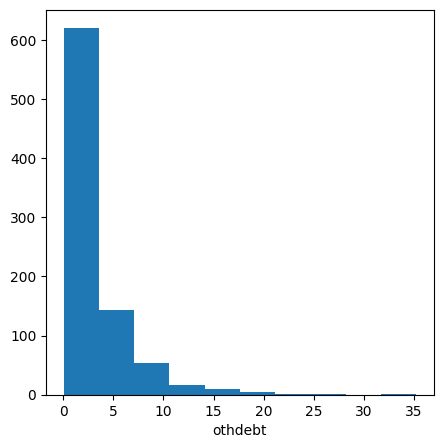

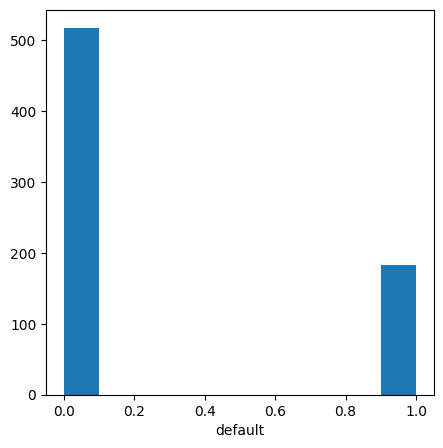

In [15]:
#univariate analysis for all the features
for i in df.columns:
  plt.figure(figsize=(5,5))
  plt.hist(data=df,x=i)
  plt.xlabel(i)

#Bivariate Analysis

In [80]:
def kdeplot(feature):
     plt.figure(figsize=(10, 3))
     plt.title("Distribution for {}".format(feature))
     plot1 = sns.kdeplot(df[df['default'] == 0][feature].dropna(), color= 'grey', label= 'defaulter: No', fill = True)
     plot2 = sns.kdeplot(df[df['default'] == 1][feature].dropna(), color= 'Red', label= 'defaulter: Yes')
     plt.legend(["NON-DEFAULTER","DEFAULTER"],loc='upper right')

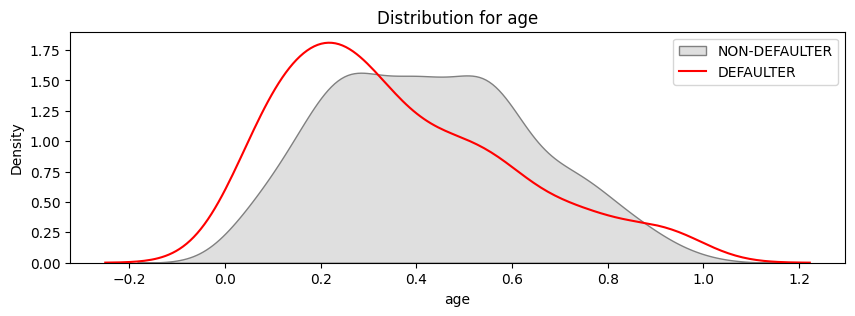

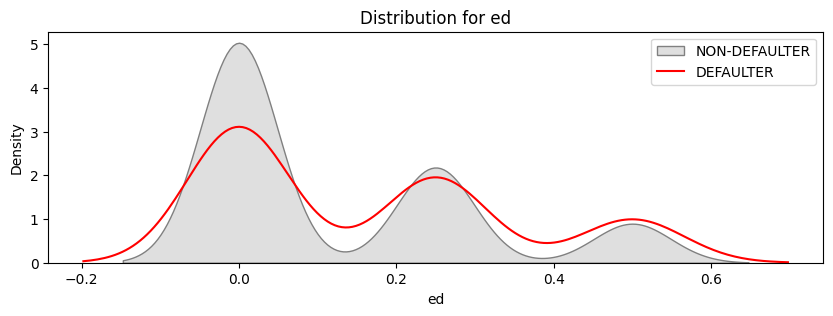

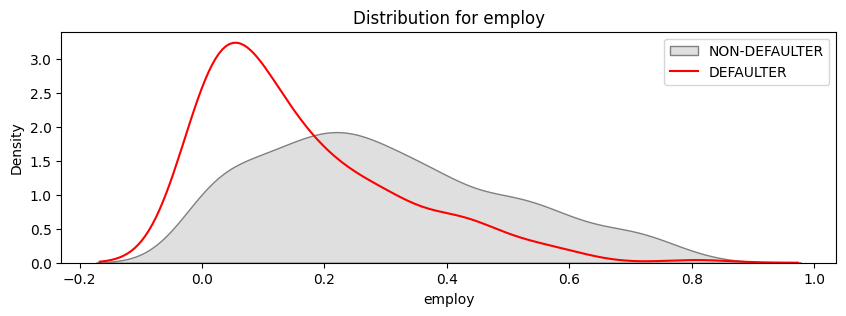

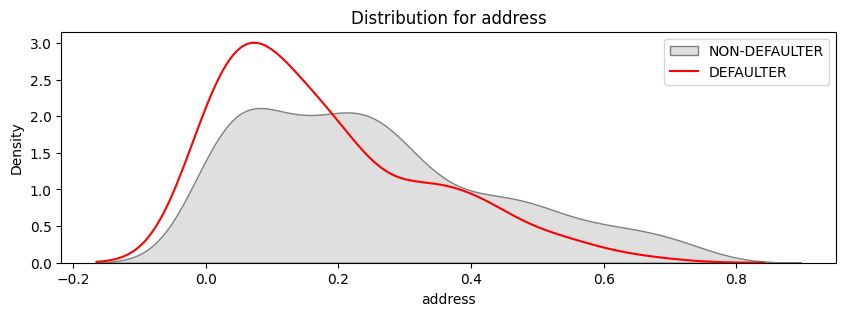

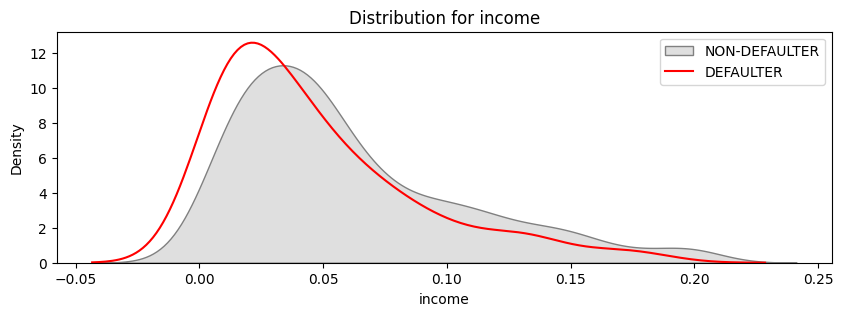

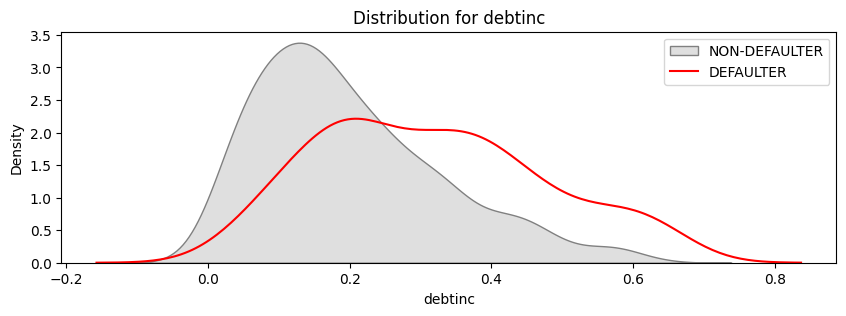

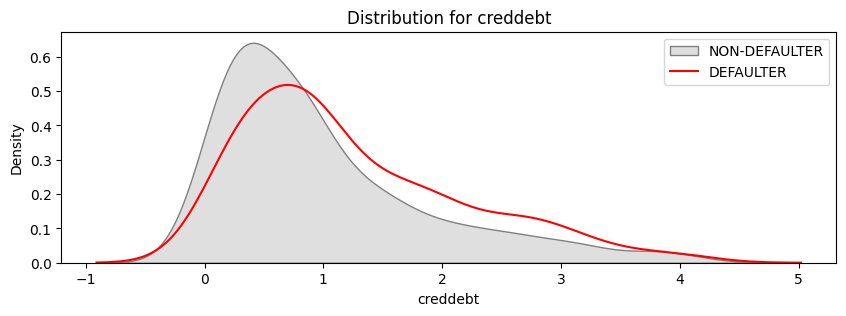

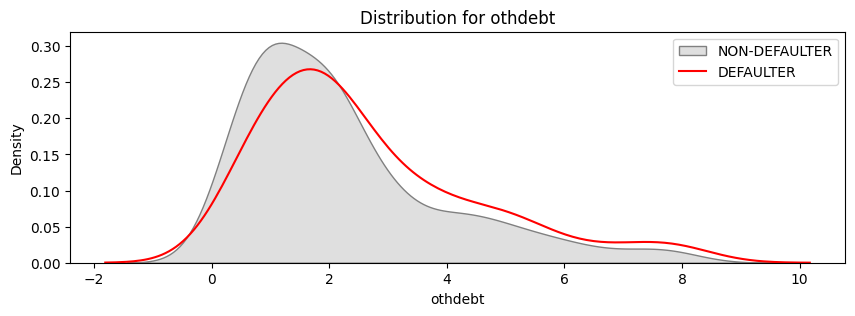

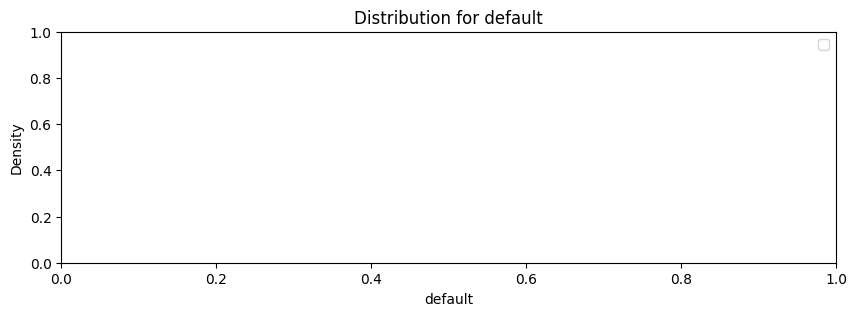

In [81]:
for feature in df.columns:
  kdeplot(feature)

#Multivariate Analysis

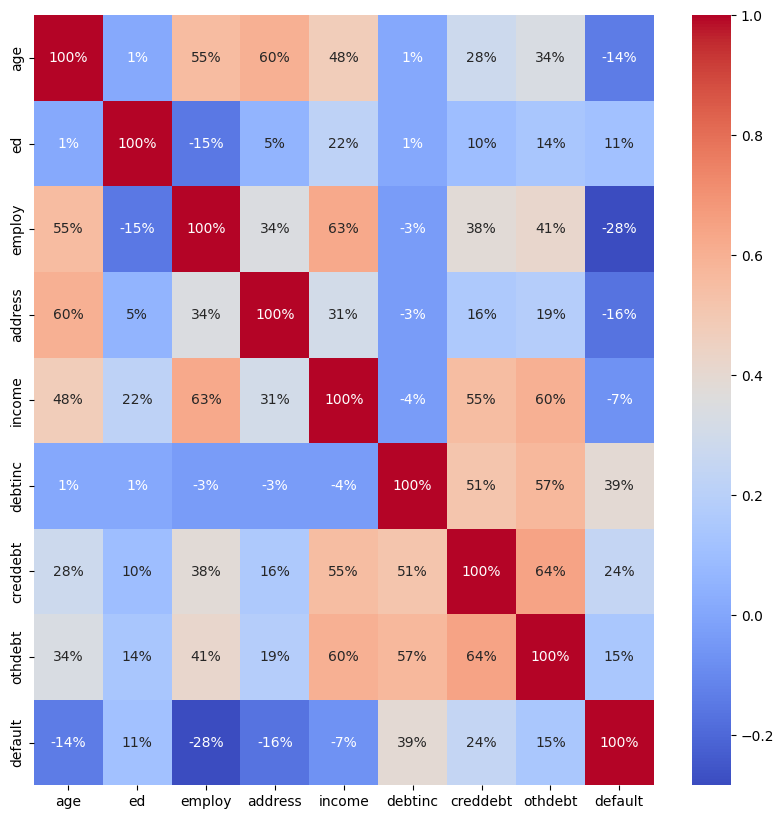

In [11]:
#creating a heatmap to see the correlation between the various features
# heatmap is shows magnitude of a phenomenon as color in two dimensions
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


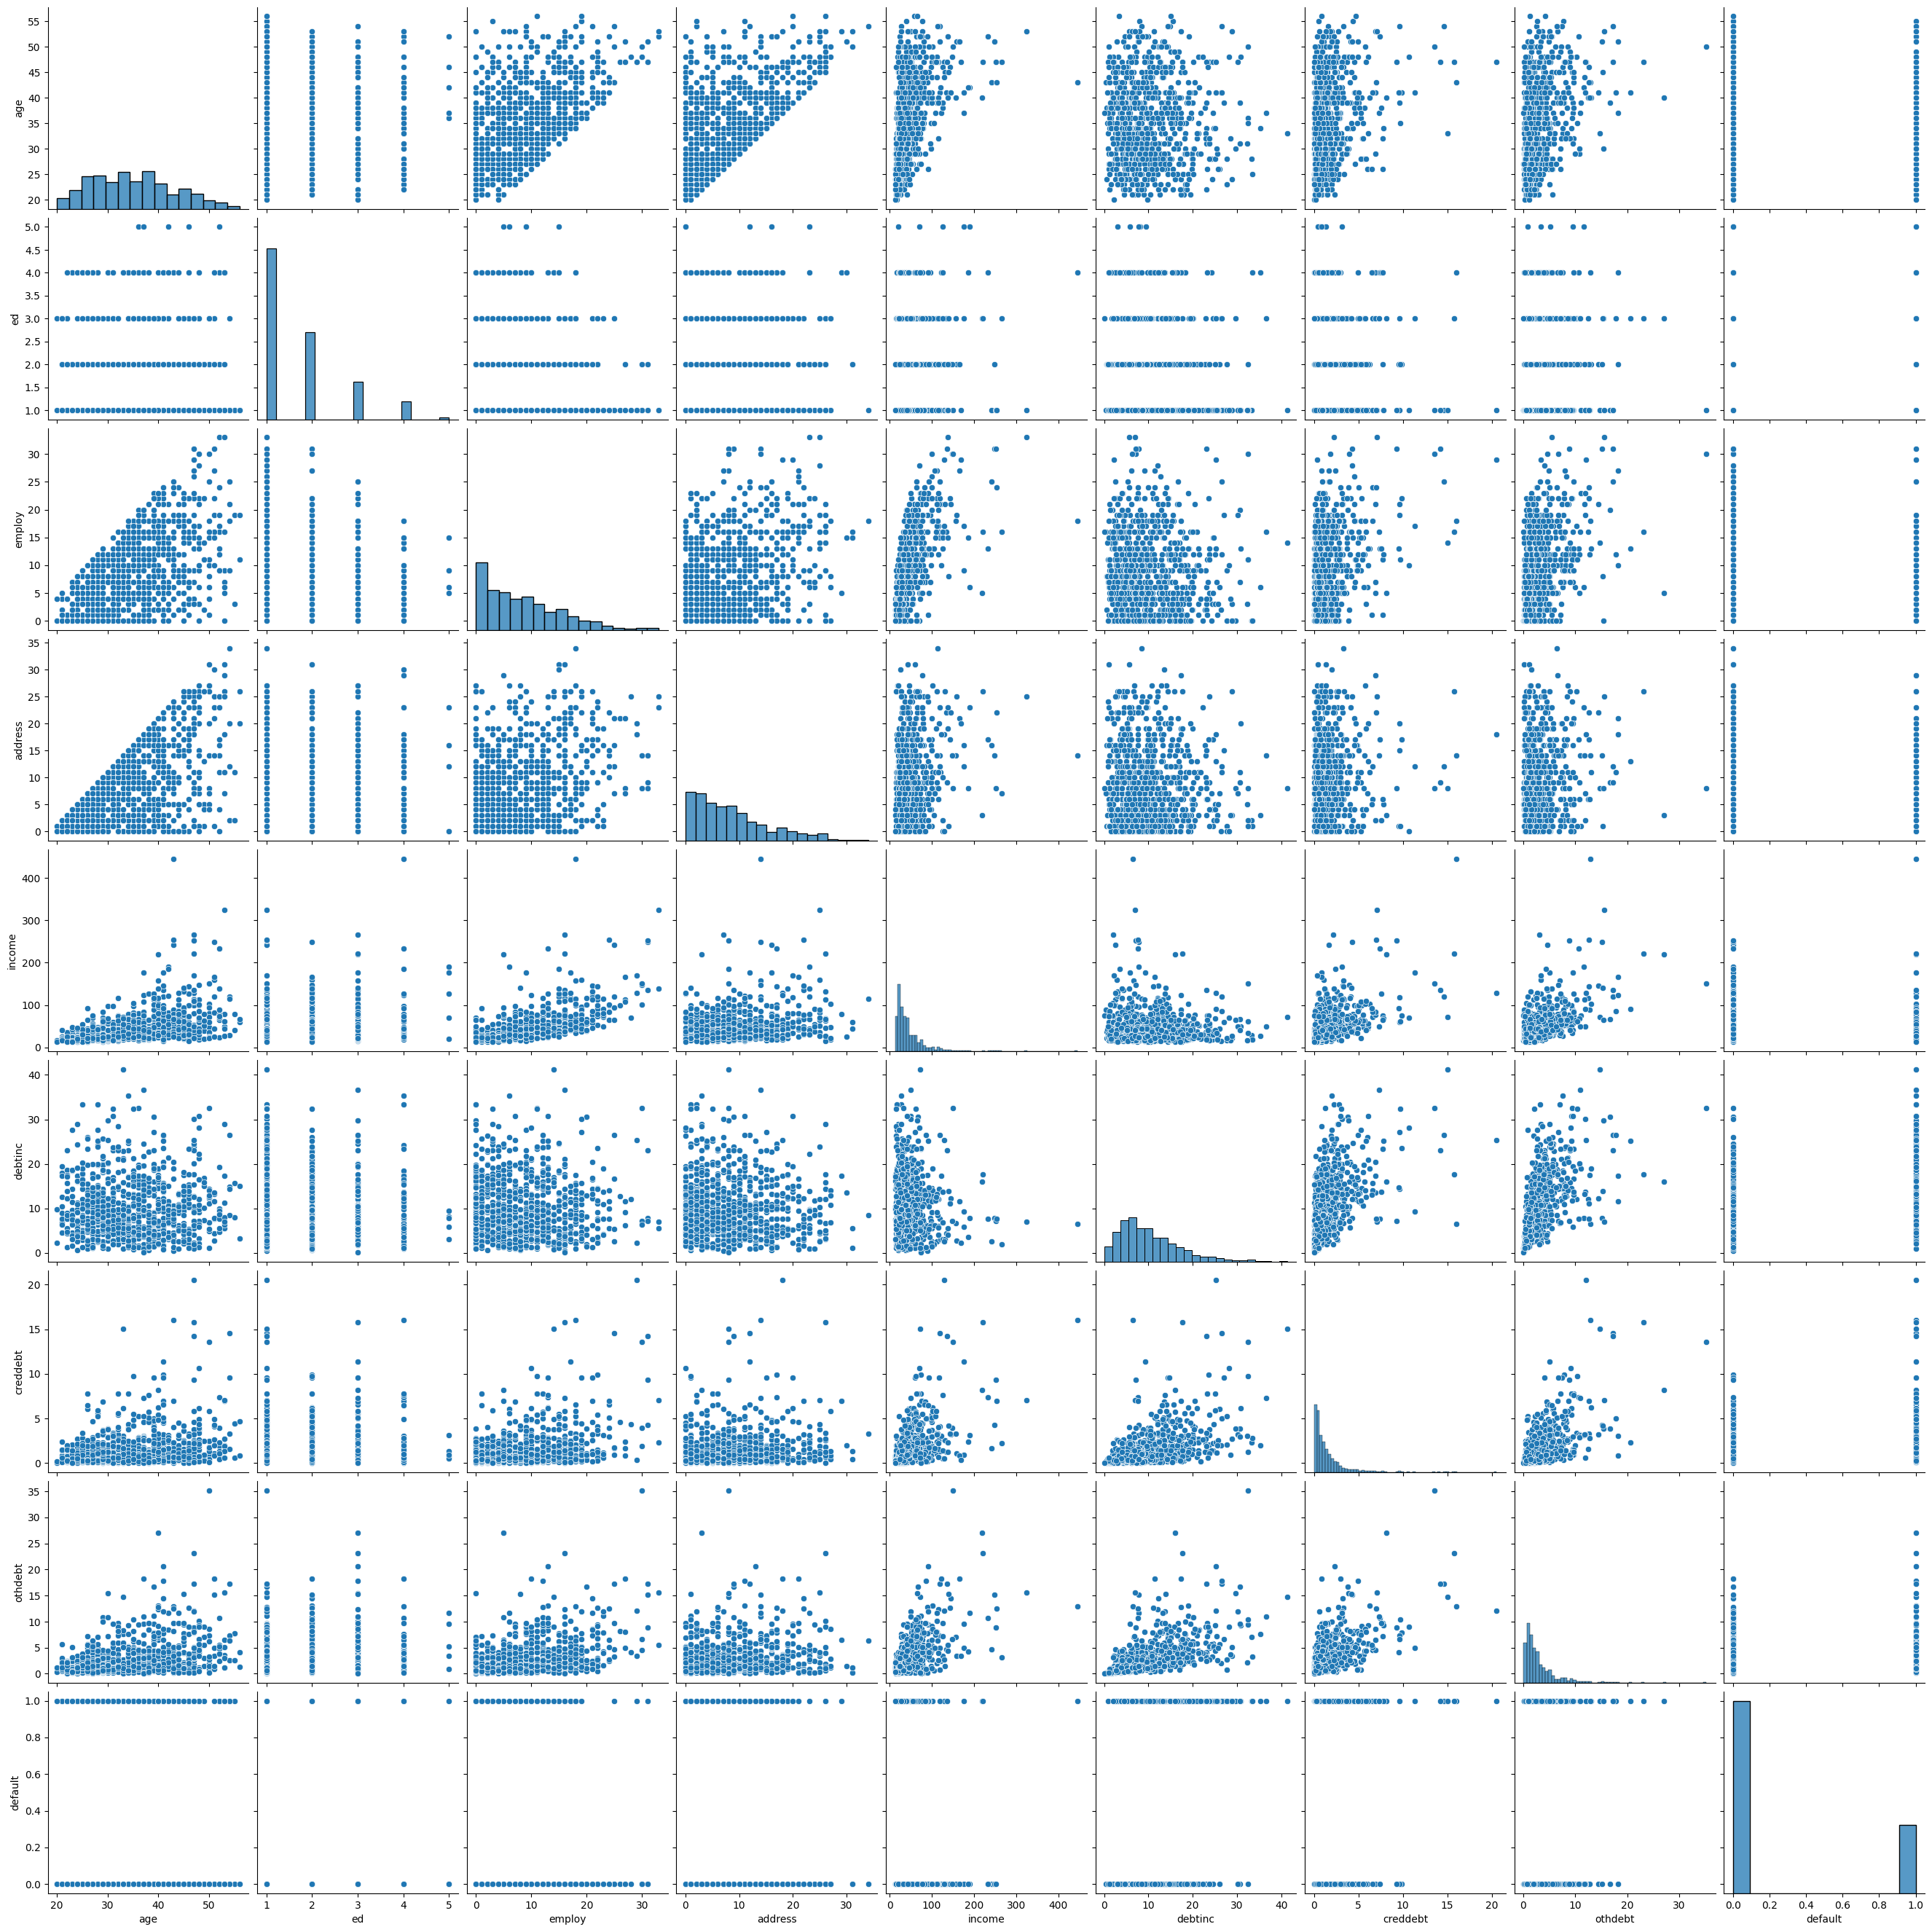

In [12]:
# checking the bivariate relation between each pair of feature using pairplot
sns.pairplot(df,size=3)

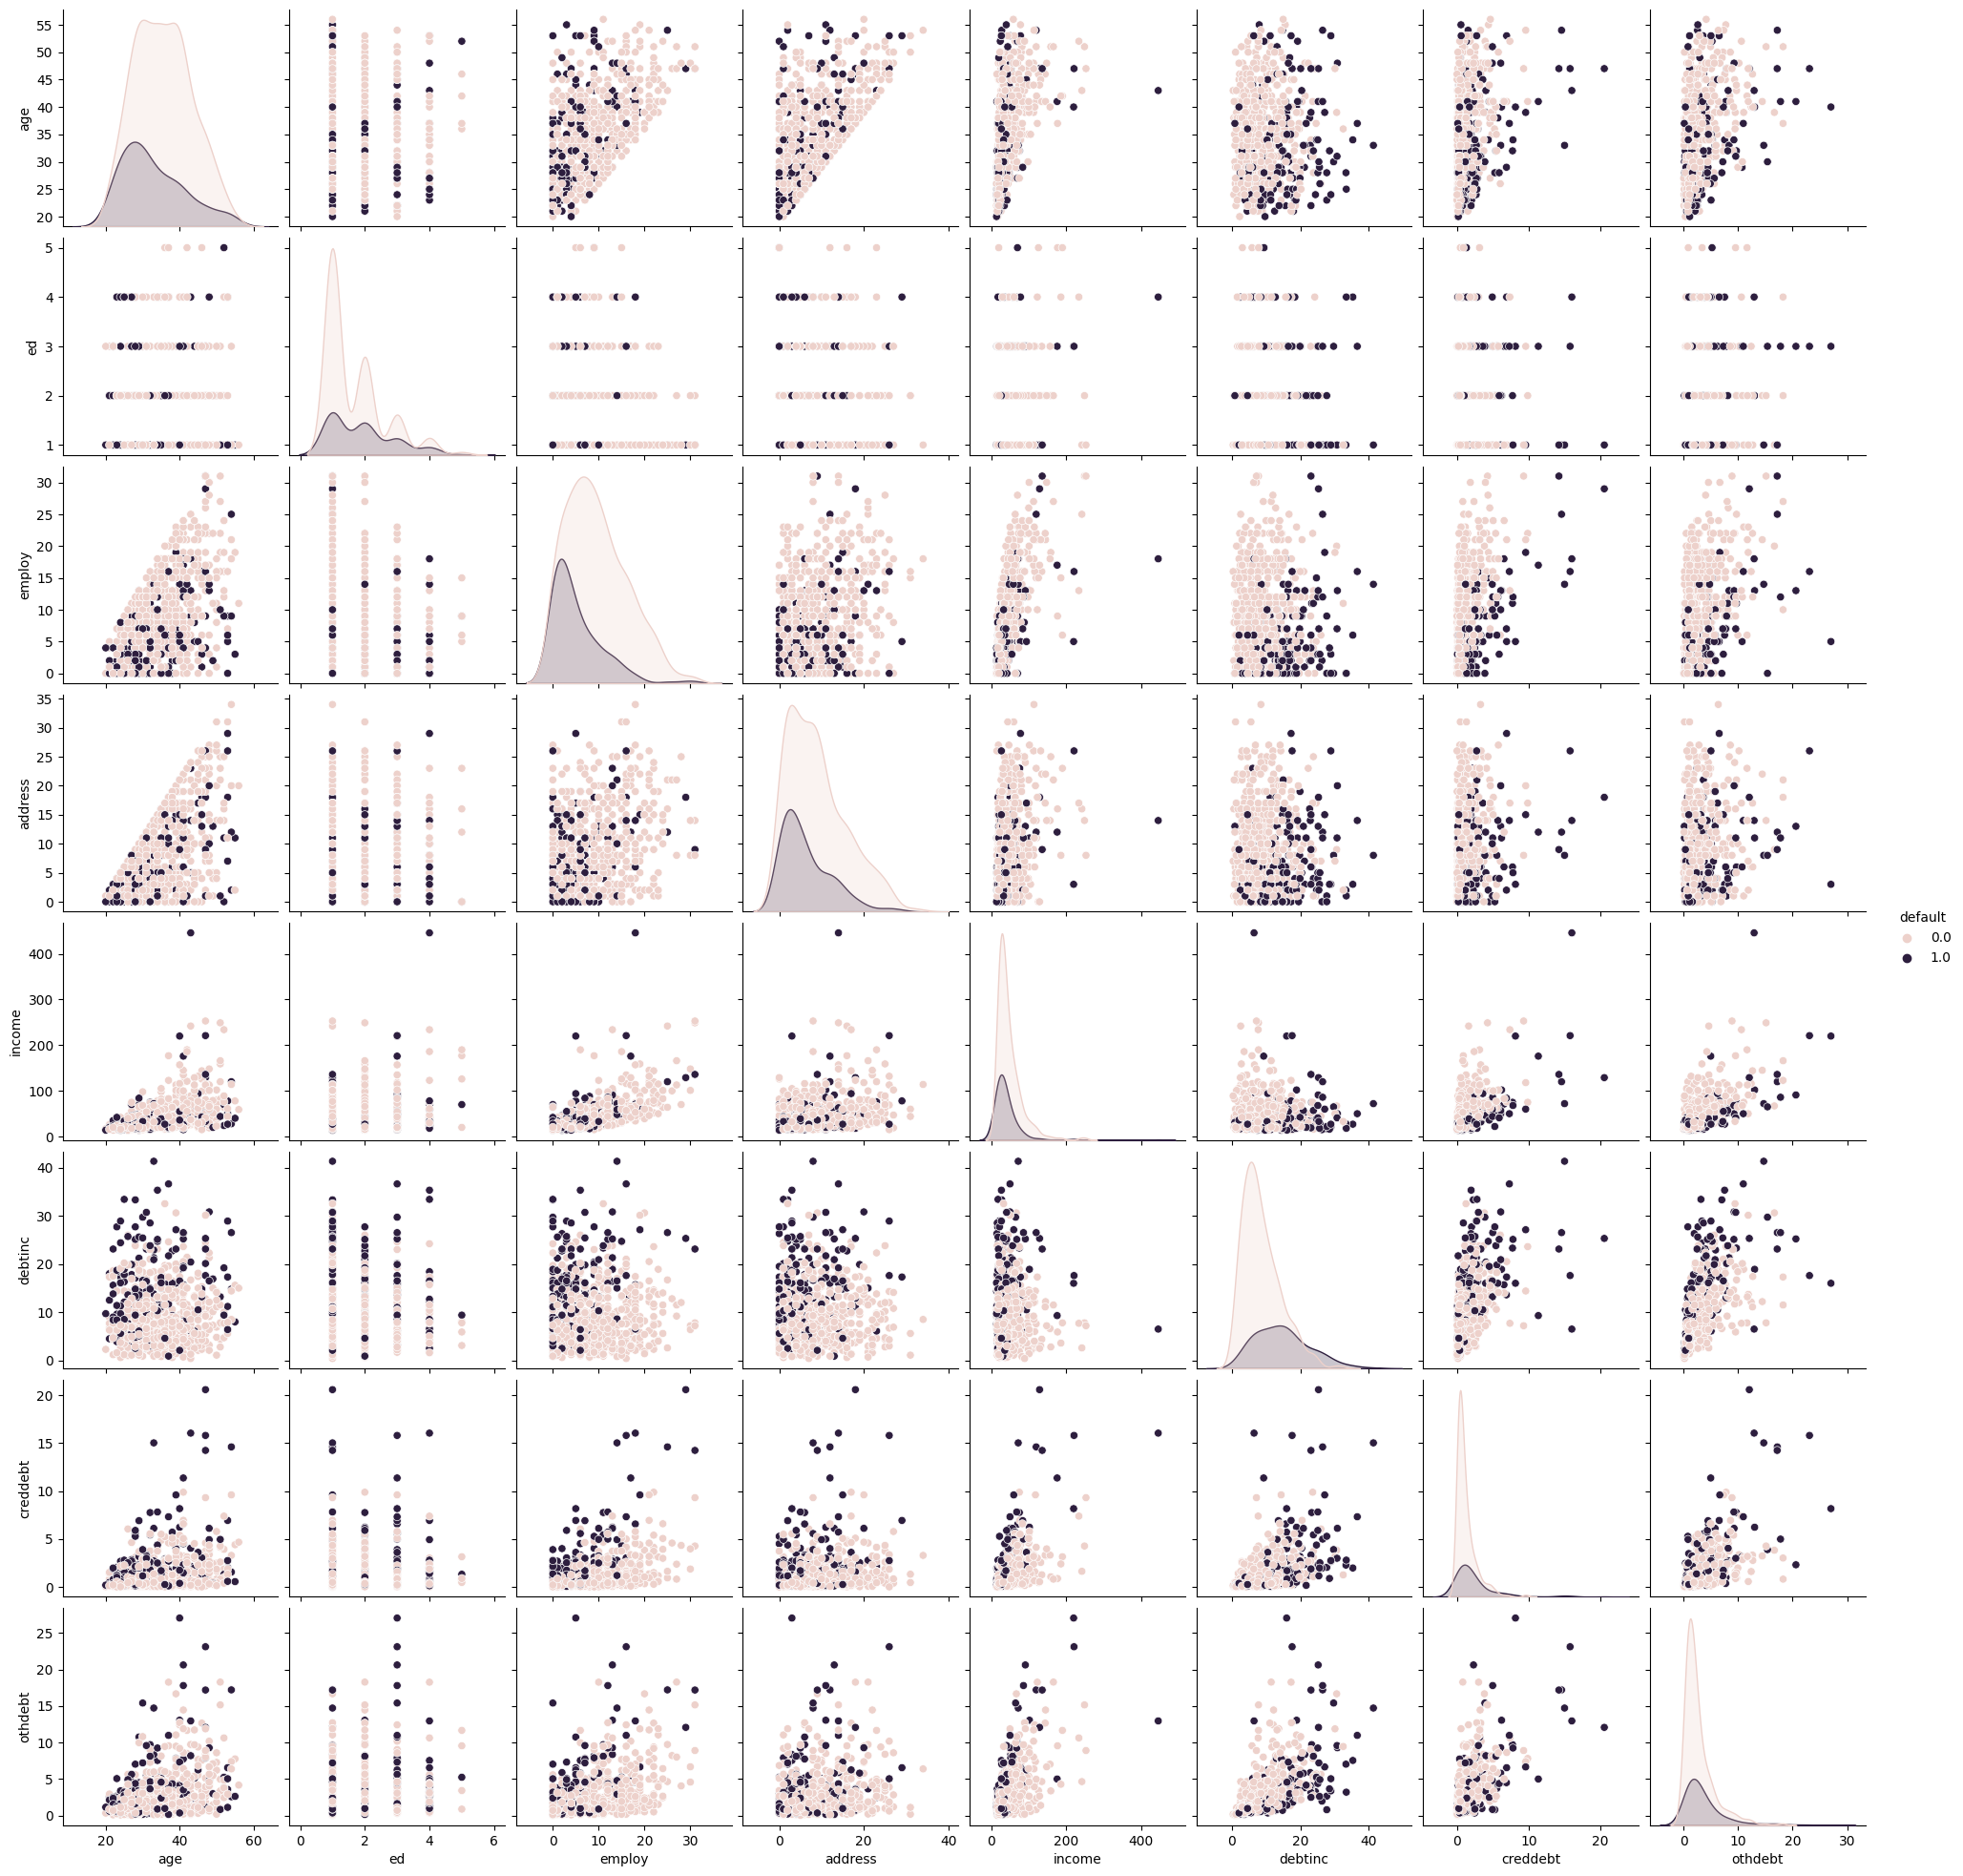

In [13]:
import seaborn as sns
sns.pairplot(df,hue='default')

In [14]:
#to check the discribtive statstical version of the data
df.describe()

age          ed      employ     address      income     debtinc  \
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000   
mean    35.029412    1.710588    8.565882    8.371765   46.675294   10.171647   
std      8.041432    0.927784    6.777884    6.895016   38.543054    6.719441   
min     20.000000    1.000000    0.000000    0.000000   13.000000    0.100000   
25%     29.000000    1.000000    3.000000    3.000000   24.000000    5.100000   
50%     34.000000    1.000000    7.000000    7.000000   35.000000    8.700000   
75%     41.000000    2.000000   13.000000   12.000000   55.750000   13.800000   
max     56.000000    5.000000   33.000000   34.000000  446.000000   41.300000   

         creddebt     othdebt     default  
count  850.000000  850.000000  700.000000  
mean     1.576805    3.078789    0.261429  
std      2.125840    3.398803    0.439727  
min      0.011696    0.045584    0.000000  
25%      0.382176    1.045942    0.000000  
50%      0.885091    2.003243    0.000000  
75%      1.898440    3.903001    1.000000  
max     20.561310   35.197500    1.000000

#RegPlot

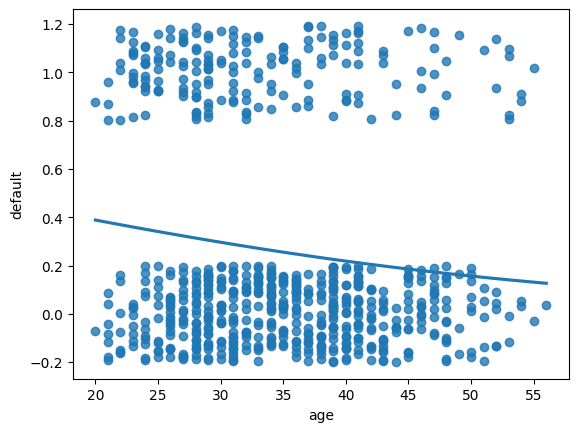

In [16]:
sns.regplot(x = "age", y = "default", y_jitter=0.2, data = df, logistic = True, ci = None)
plt.show()

in this condition any age group can take the bankloan ,understanding fron this graph

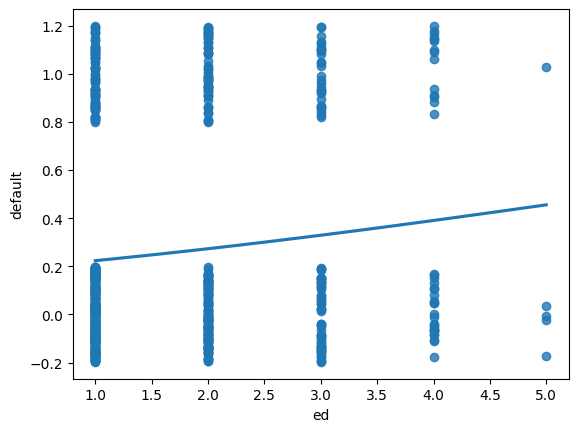

In [17]:
sns.regplot(x = "ed", y = "default", y_jitter=0.2, data = df, logistic = True, ci = None)
plt.show()

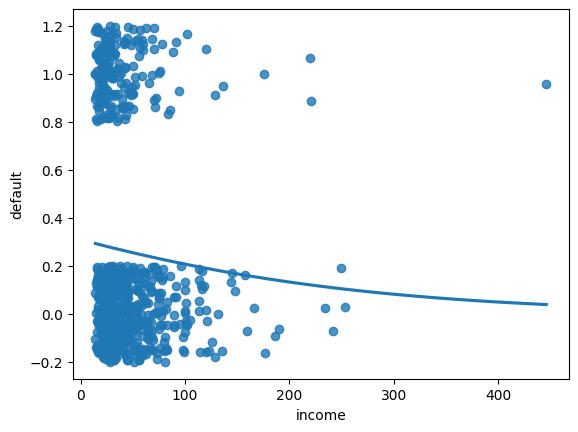

In [18]:
sns.regplot(x = "income", y = "default", y_jitter=0.2, data = df, logistic = True, ci = None)
plt.show()

 default bankloan had taken when income is low and vice-versa

#Histogram

In [78]:
def histplot(feature):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data= df, x= feature, bins= 30, kde= True, color='green')
    plt.subplot(1, 2, 2)
    sns.histplot(data= df, x= feature, bins= 30, kde= True, hue= 'default')
    plt.show()

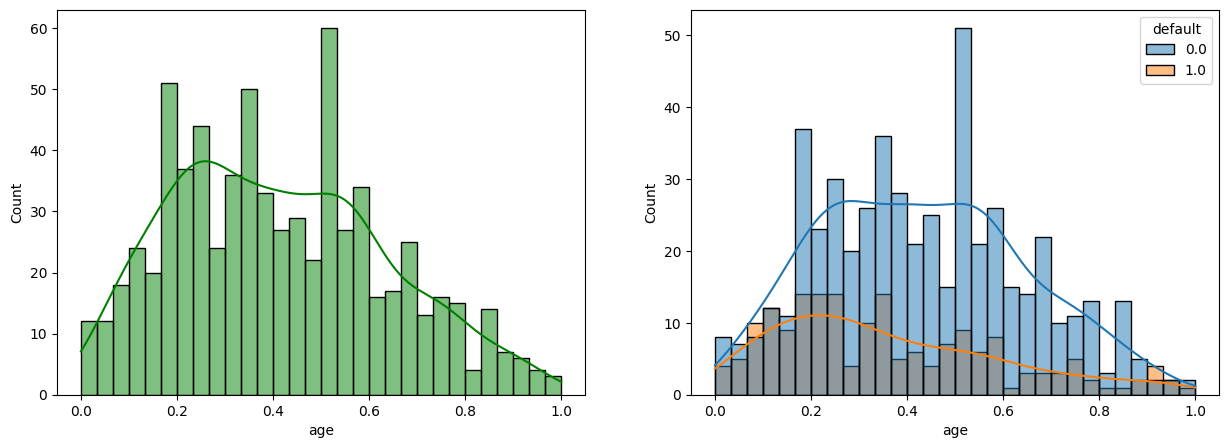

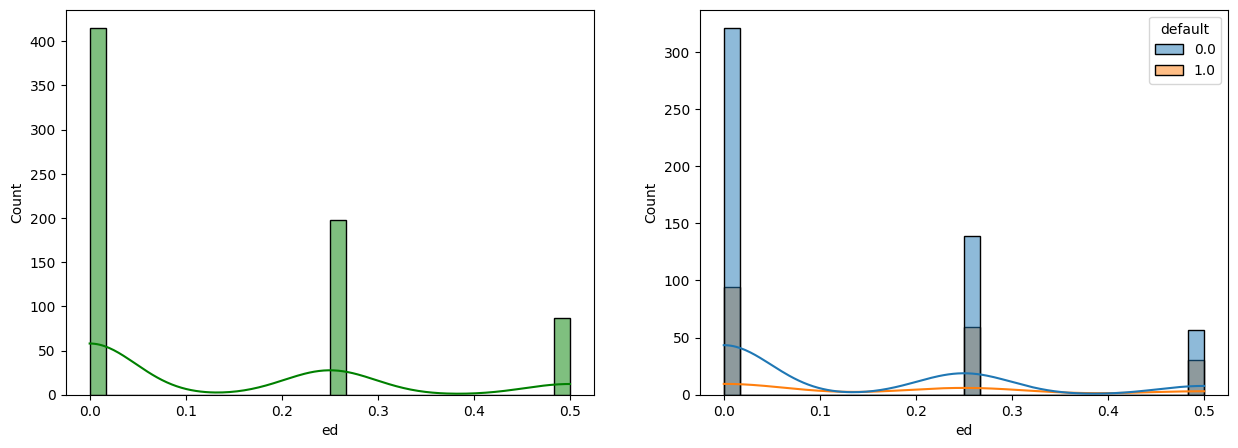

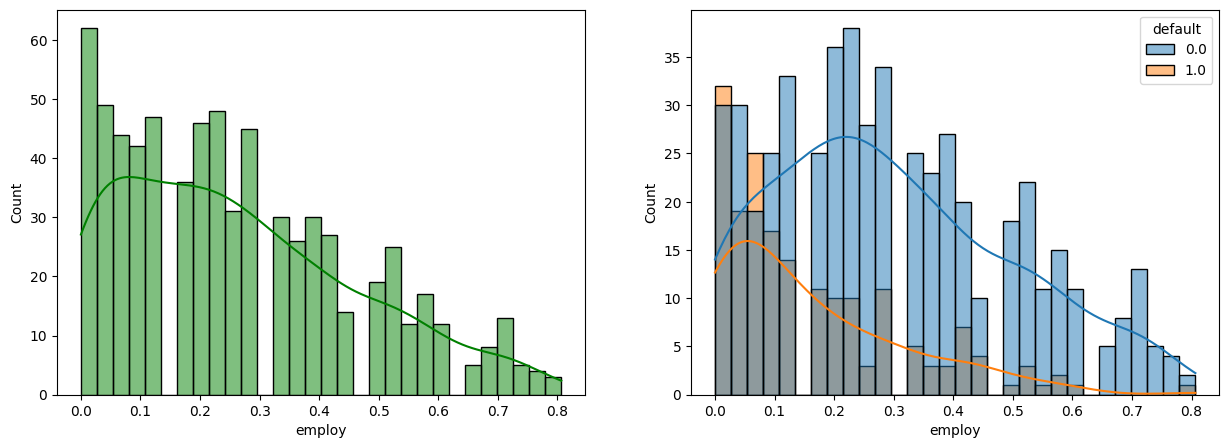

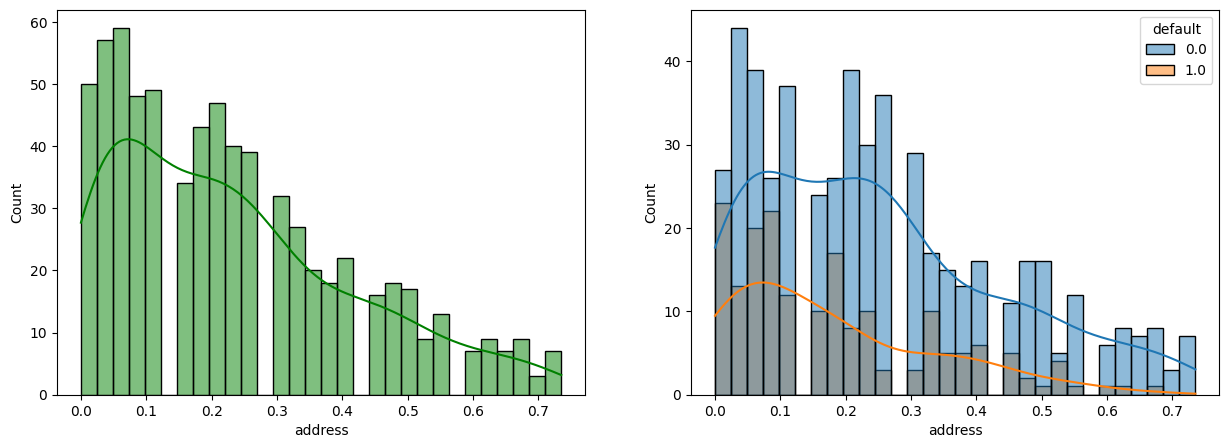

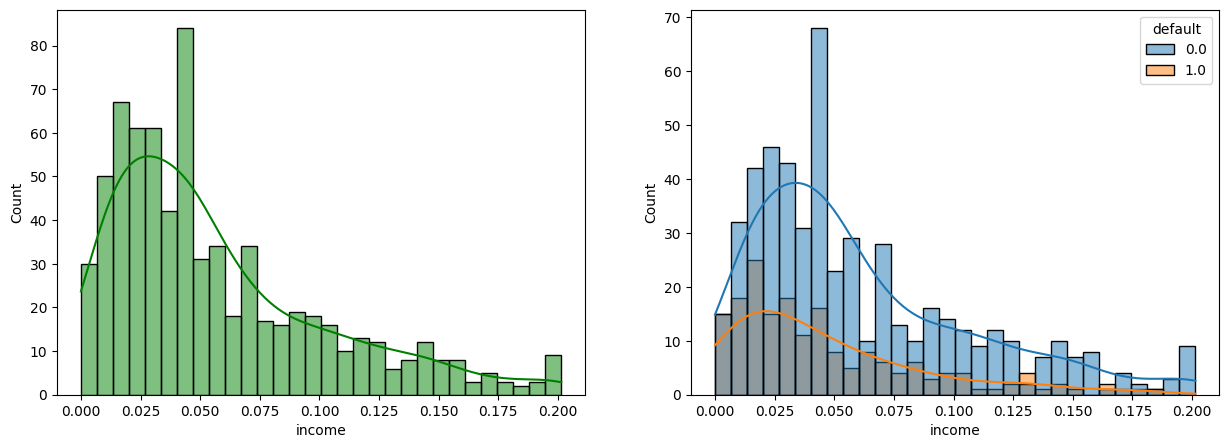

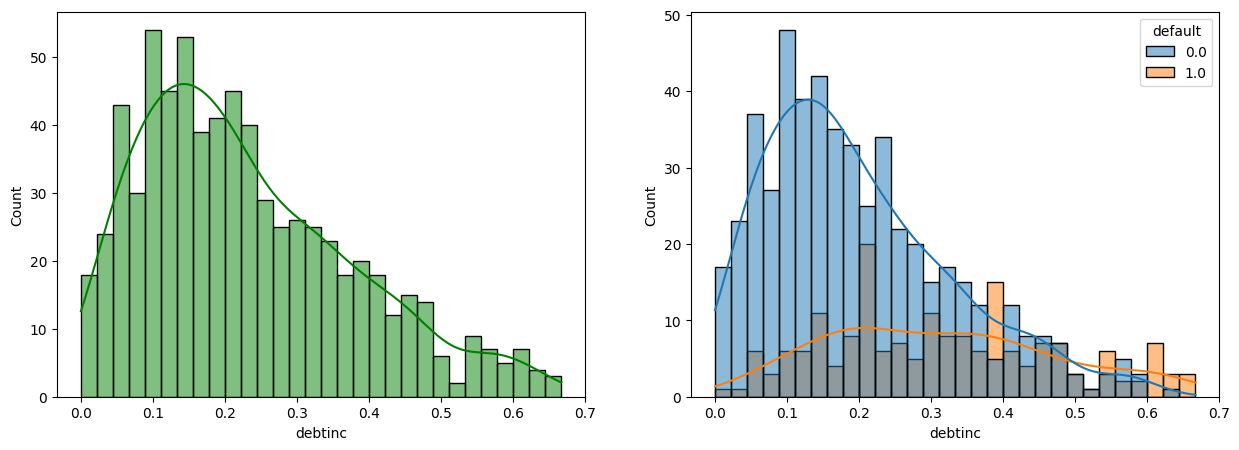

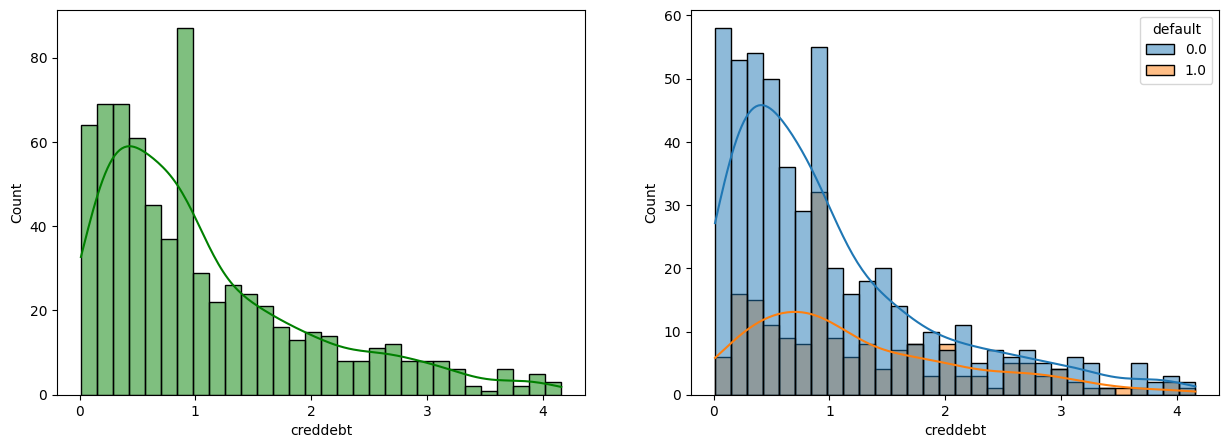

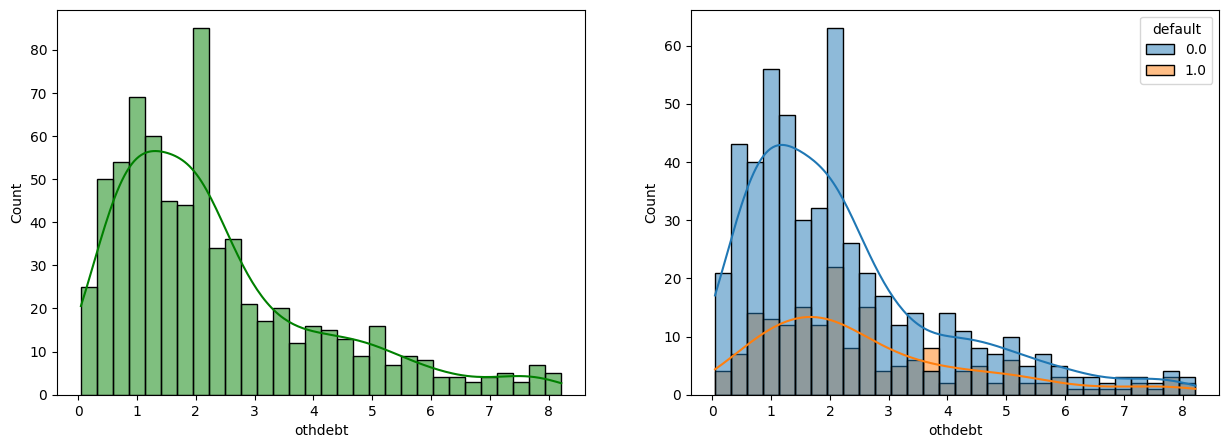

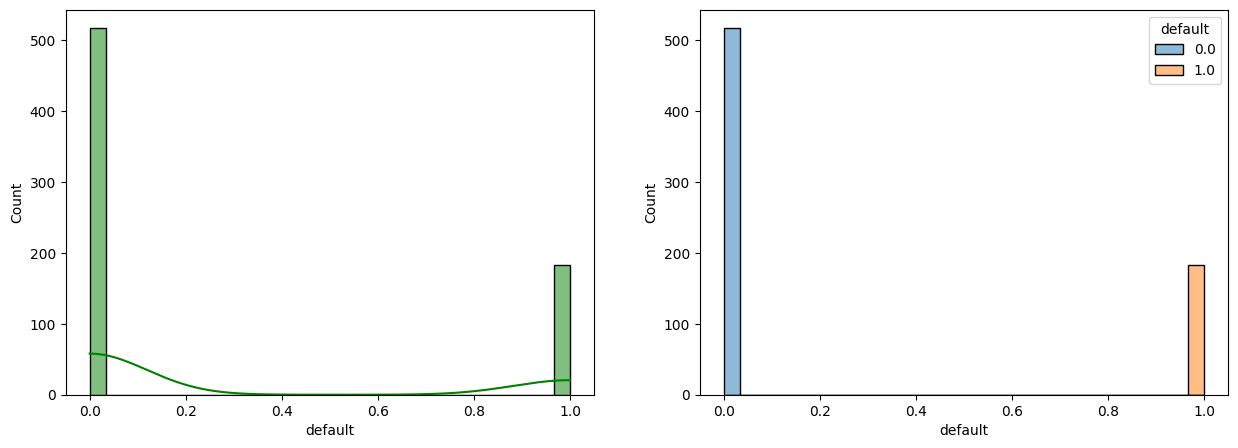

In [79]:
for feature in df.columns:
  histplot(feature)

#DistPlot

<ipython-input-19-e08709610305>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'], kde = True)


<Axes: xlabel='income', ylabel='Density'>

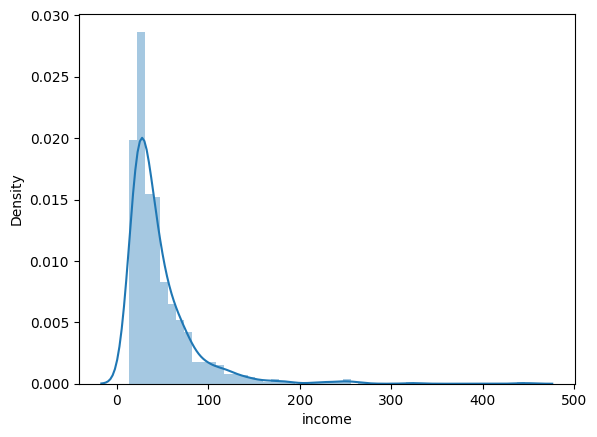

In [19]:
sns.distplot(df['income'], kde = True)

<ipython-input-20-3b929d1573f8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde = True)


<Axes: xlabel='age', ylabel='Density'>

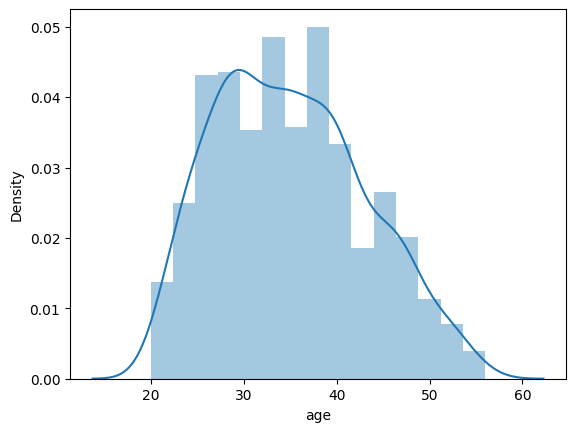

In [20]:
#Identifying outliers in 'gravity' 
sns.distplot(df['age'], kde = True)

<ipython-input-21-13a779a8ccf9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['debtinc'], kde = True)


<Axes: xlabel='debtinc', ylabel='Density'>

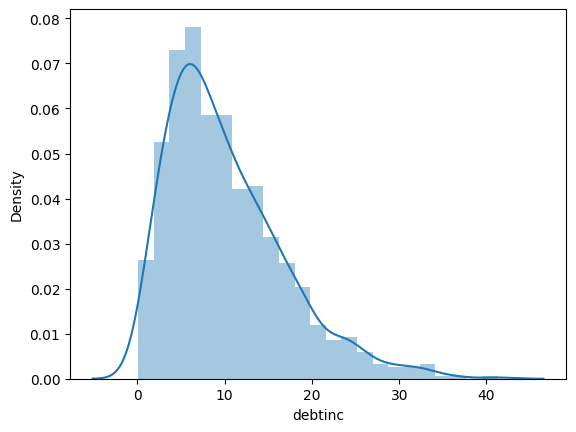

In [21]:
sns.distplot(df['debtinc'], kde = True)

<ipython-input-22-8330da82acd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ed'], kde = True)


<Axes: xlabel='ed', ylabel='Density'>

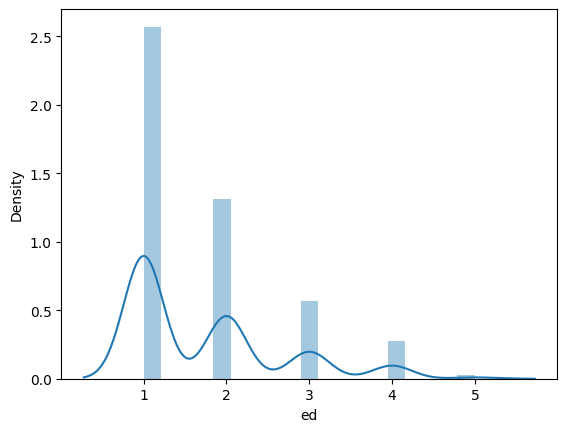

In [22]:
sns.distplot(df['ed'], kde = True)

<ipython-input-23-ba9d5e8e9cde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['employ'], kde = True)


<Axes: xlabel='employ', ylabel='Density'>

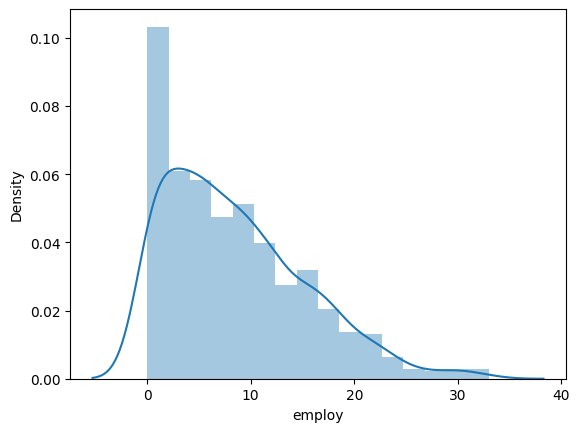

In [23]:
sns.distplot(df['employ'], kde = True)

In this dataset there are many missing data's are present so we are going to drop those missing values

#Data Cleaning

In [24]:
df=df.dropna()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [26]:
df.shape

(700, 9)

as we can see before 850 rows are present in this dataset but after droping the missing rows now 700 rows are present

In [27]:
#cheecking the shape of the data
print('Shape: ', df.shape)
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Shape:  (700, 9)
Rows:  700
Columns:  9


In [28]:
#calculating the no.of 1's and 0's
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [29]:
#this is average accuracy
517/700

0.7385714285714285

#Outlier

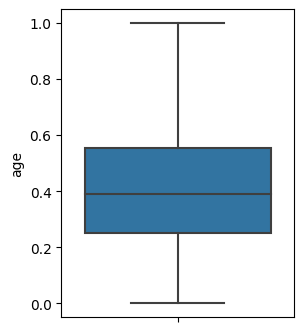

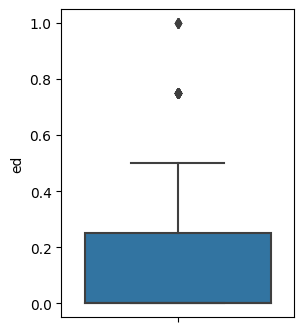

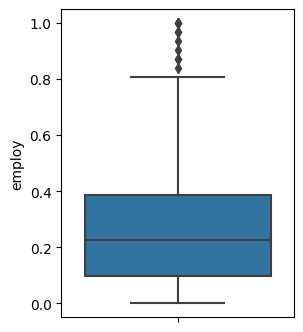

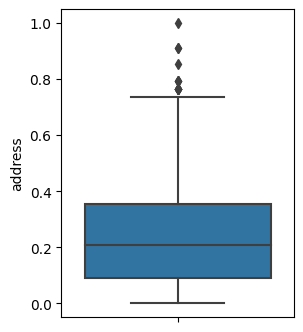

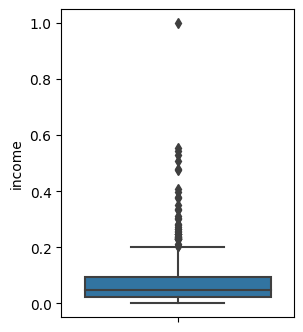

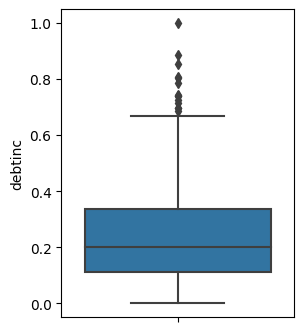

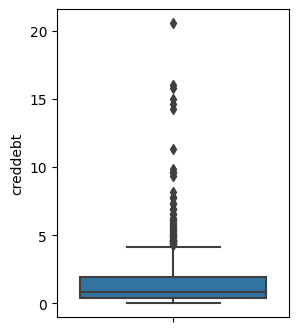

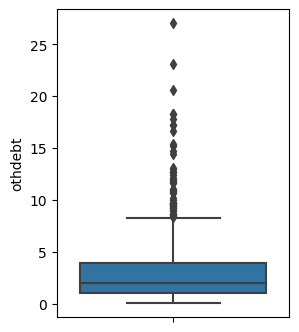

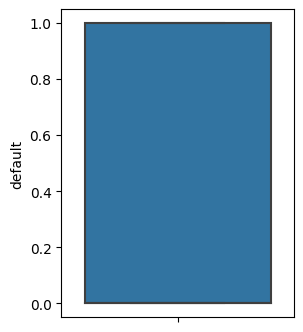

In [76]:
def identify_outliers(give_df_name, give_column_name):
    for i in df.columns:
        fig = plt.figure(figsize=(3,4))
        sns.boxplot(data = df, y = i)
plt.show()

identify_outliers(df, df.columns)

Q1 = 0.2499999999999999 Q2 =  0.38888888888888884 Q3 =  0.5555555555555556
upper 1.013888888888889
lower -0.20833333333333365
Q1 = 0.0 Q2 =  0.0 Q3 =  0.25
upper 0.625
lower -0.375
Q1 = 0.0967741935483871 Q2 =  0.22580645161290322 Q3 =  0.3870967741935484
upper 0.8225806451612903
lower -0.33870967741935476
Q1 = 0.08823529411764705 Q2 =  0.20588235294117646 Q3 =  0.3529411764705882
upper 0.7499999999999999
lower -0.3088235294117646
Q1 = 0.023148148148148147 Q2 =  0.04629629629629629 Q3 =  0.09490740740740738
upper 0.20254629629629625
lower -0.08449074074074073
Q1 = 0.11246943765281174 Q2 =  0.20048899755501223 Q3 =  0.33557457212713937
upper 0.6702322738386308
lower -0.2221882640586797
Q1 = 0.36905925 Q2 =  0.8548695 Q3 =  1.901955
upper 4.201298625
lower -1.930284375
Q1 = 1.0441782499999999 Q2 =  1.9875675 Q3 =  3.92306475
upper 8.2413945
lower -3.2741515000000003
Q1 = 0.0 Q2 =  0.0 Q3 =  1.0
upper 2.5
lower -1.5


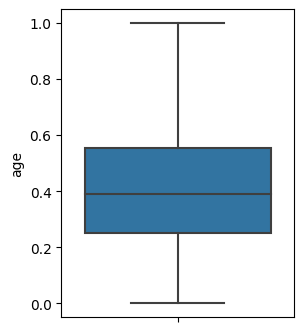

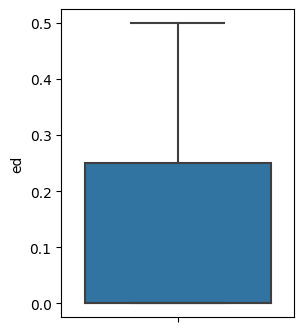

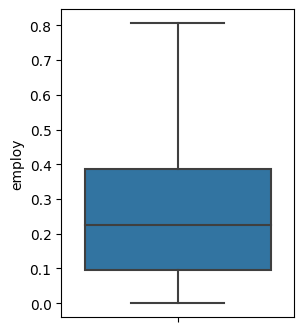

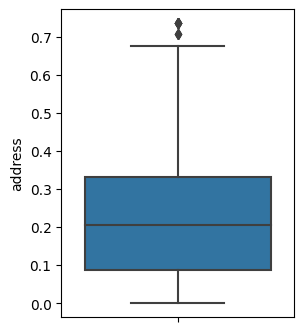

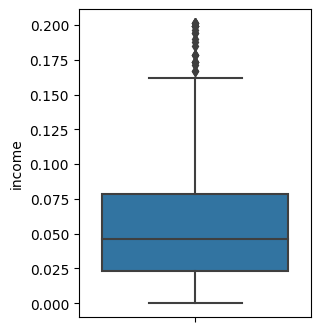

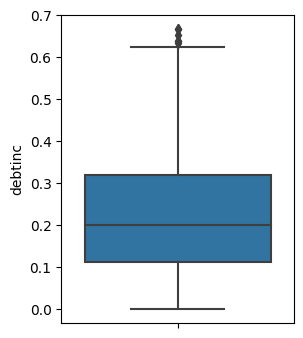

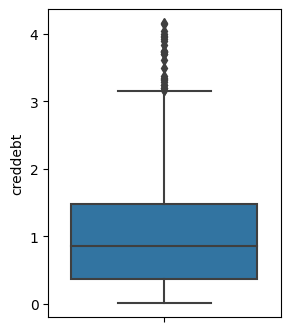

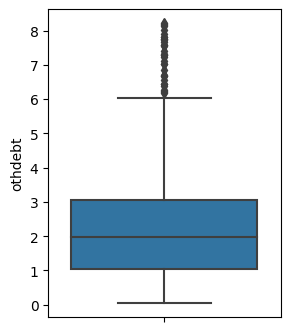

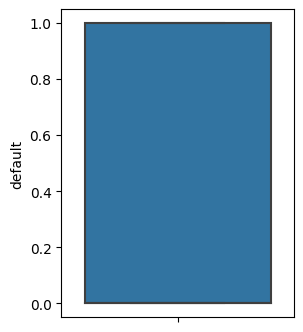

In [77]:
def rectify_outliers(give_df_name, give_column_name):
      for i in df.columns:
            Q1 = np.percentile(df[i], 25)
            Q2 = np.percentile(df[i], 50)
            Q3 = np.percentile(df[i], 75)
            IQR = Q3 - Q1        
            print('Q1 =',Q1,'Q2 = ',Q2,'Q3 = ',Q3)

            upper_val = Q3 + (1.5 * IQR)
            print('upper', upper_val)
            lower_val = Q1 - (1.5 * IQR)
            print('lower', lower_val)

            df.loc[df[i] > upper_val, i] = np.median(df[i])
            df.loc[df[i] < lower_val, i] = np.median(df[i])
                    
            fig = plt.figure(figsize = (3,4))
            sns.boxplot(data = df,y = i)
            plt.xticks(rotation = 'horizontal')
plt.show()

rectify_outliers(df, df.columns)

In [31]:
#perfoming min max scaling
#importing requried library
from sklearn.preprocessing import MinMaxScaler


#intialization the model
model = MinMaxScaler()
df.iloc[:, :6] = model.fit_transform(df.iloc[:, :6])
df.head()

<ipython-input-31-8274921647b9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, :6] = model.fit_transform(df.iloc[:, :6])


age    ed    employ   address    income   debtinc   creddebt  \
0  0.583333  0.50  0.548387  0.352941  0.375000  0.217604  11.359392   
1  0.194444  0.00  0.322581  0.176471  0.039352  0.413203   1.362202   
2  0.555556  0.00  0.483871  0.411765  0.094907  0.124694   0.856075   
3  0.583333  0.00  0.483871  0.411765  0.245370  0.061125   2.658720   
4  0.111111  0.25  0.064516  0.000000  0.032407  0.413203   1.787436   

    othdebt  default  
0  5.008608      1.0  
1  4.000798      0.0  
2  2.168925      0.0  
3  0.821280      0.0  
4  3.056564      1.0

#Splitting the dataset into Test and Train

In [82]:
#separating input feature input and output variables
x = df.iloc[:, :6]
y = df['default']


In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.2,random_state = 7)

#Logistic Regression

In [84]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(x_train, y_train)

In [85]:
from sklearn import metrics
prediction_test = model.predict(x_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7714285714285715


Axes(0.125,0.11;0.775x0.77)


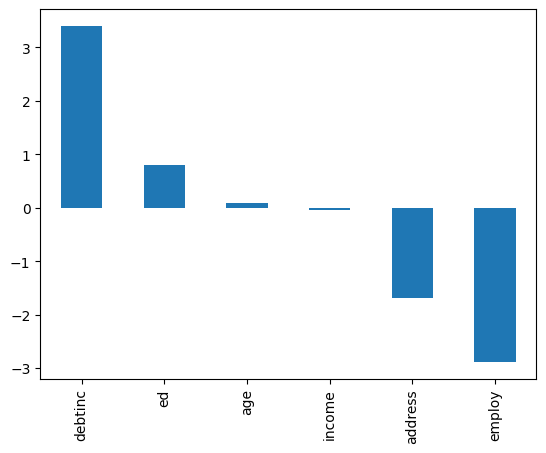

In [86]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=x.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

#KNeibhoursClassifier

In [87]:
#getting optimal value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for i in range(3, 50, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    train_acc = (accuracy_score(model.predict(x_train), y_train))
    test_acc = (accuracy_score(model.predict(x_test), y_test))
    acc.append([train_acc,test_acc])
    
    
print('Accuracy :\n', acc)   

Accuracy :
 [[0.8553571428571428, 0.7428571428571429], [0.8428571428571429, 0.7285714285714285], [0.8089285714285714, 0.75], [0.7946428571428571, 0.7642857142857142], [0.7875, 0.8], [0.7875, 0.7642857142857142], [0.7875, 0.7785714285714286], [0.7875, 0.7785714285714286], [0.7875, 0.7714285714285715], [0.7857142857142857, 0.7785714285714286], [0.7821428571428571, 0.7928571428571428], [0.7785714285714286, 0.8], [0.7767857142857143, 0.8071428571428572], [0.7714285714285715, 0.7928571428571428], [0.7625, 0.7857142857142857], [0.7607142857142857, 0.7857142857142857], [0.7678571428571429, 0.7785714285714286], [0.7678571428571429, 0.7857142857142857], [0.7803571428571429, 0.7928571428571428], [0.7714285714285715, 0.7928571428571428], [0.7678571428571429, 0.8], [0.7625, 0.8071428571428572], [0.7625, 0.8], [0.7625, 0.8]]


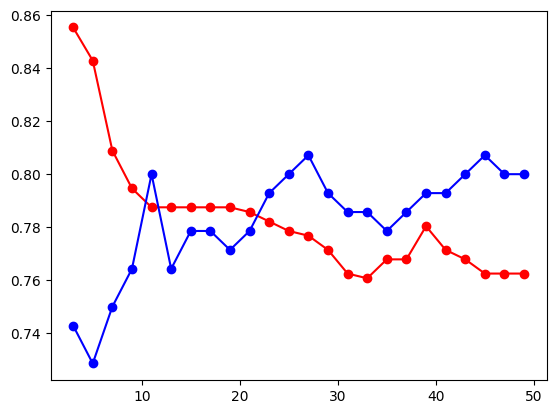

In [88]:
plt.plot(np.arange(3, 50, 2),[i[0]for i in acc], 'ro-')
plt.plot(np.arange(3, 50, 2),[i[1]for i in acc], 'bo-')
plt.show()

In [89]:
model =  KNeighborsClassifier(n_neighbors = 3)
#fitting the model
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [90]:
#predicting from the model
y_pred = model.predict(x_test)

In [91]:
#getting the accuracy
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.7428571428571429


##Bagging Classfier

In [92]:
#creating the model
#intialization
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = model,
                         n_estimators = 100,
                         bootstrap = True,
                         n_jobs = -1,
                         random_state = 7)

#fitting the model
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100, n_jobs=-1, random_state=7)

#vif

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'{features}')

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default']


In [95]:
def compute_vif(features, df):
    X = df[features]
    #calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    #create a dataframe to store the VIF values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['Vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

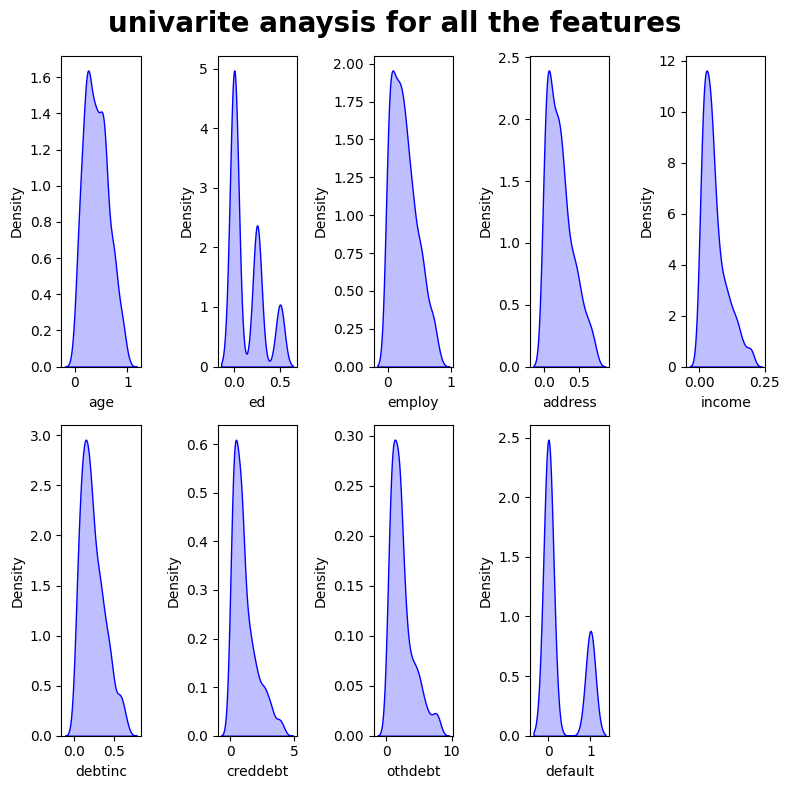

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.suptitle('univarite anaysis for all the features', fontsize = 20, fontweight = 'bold')

for i in range(0, len(features)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x= df[features[i]], shade = True, color = 'b')
    plt.xlabel(features[i])
    plt.tight_layout()
    
#saving the img
plt.savefig('univariate_num.png')

In [97]:
import warnings
warnings.filterwarnings('ignore')

compute_vif(features,df)

Variable       Vif
0       age  1.794522
1        ed  1.081234
2    employ  1.913178
3   address  1.429636
4    income  1.988482
5   debtinc  1.985085
6  creddebt  1.414225
7   othdebt  2.009172
8   default  1.282581

#Decision Tree

In [98]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [99]:
# instantiate the DecisionTreeClassifier model with criterion gini index

model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [100]:
# fit the model
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [101]:
#Predict the Test set results with criterion gini index
y_pred_test_gini = model_gini.predict(x_test)
y_pred_train_gini = model_gini.predict(x_train)

In [102]:
#accuracy of the training dataset
print('Training-set accuracy score with gini entropy: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score with gini entropy: 0.7857


In [103]:
#getting the accuracy
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.7428571428571429


In [104]:
#predicting from the model
y_pred = model.predict(x_test)

In [105]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score for test set with criterion gini: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test_gini)))

Model accuracy score for test set with criterion gini: 0.7714


#Conclution